Used Car Price Prediction : End to End Machine Learning Project

1) Understanding Problem Statement

Problem Statement:
The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

Approach:
We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

Objective:
To build suitable Machine Learning Model for Used Car Price Prediction.

Benefits:
> Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
> Buyers will be able to find cars that are priced more competitively.
> The overall used car market in India will become more efficient.

2) Getting System Ready : Importing Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

3) Data Collection : Download and Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('cardekho_dataset.csv')
df.head(3)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000


4) Understanding the Data-Data Eyeballing & Data Description

In [3]:
print('The size of Dataframe is: ', df.shape)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()

The size of Dataframe is:  (15411, 14)
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), in

In [4]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


Data Decritption(Feature Information):

car_name         : Car's Full name, which includes brand and specific model name.
brand            : Brand Name of the particular car.
model            : Exact model name of the car of a particular brand.
seller_type      : Which Type of seller is selling the used car
fuel_type        : Fuel used in the used car, which was put up on sale.
transmission_type: Transmission used in the used car, which was put on sale.
vehicle_age      : The count of years since car was bought.
mileage          : It is the number of kilometer the car runs per litre.
engine           : It is the engine capacity in cc(cubic centimeters)
max_power        : Max power it produces in BHP.
seats            : Total number of seats in car.
selling_price    : The sale price which was put up on website.

In [5]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 


,Total,Percent
Unnamed: 0,0,0.0
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0


In [6]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [7]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [8]:
#Checking no of Unique categories present in categorical columns
print('No of Unique categories in car_name          :',df['car_name'].nunique())
print('No of Unique categories in brand             :',df['brand'].nunique())
print('No of Unique categories in model             :',df['model'].nunique())
print('No of Unique categories in seller_type       :',df['seller_type'].nunique())
print('No of Unique categories in fuel_type         :',df['fuel_type'].nunique())
print('No of Unique categories in transmission_type :',df['transmission_type'].nunique())

No of Unique categories in car_name          : 121
No of Unique categories in brand             : 32
No of Unique categories in model             : 120
No of Unique categories in seller_type       : 3
No of Unique categories in fuel_type         : 5
No of Unique categories in transmission_type : 2


In [9]:
print('The percentage of each category in categorical column are as follow : ')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

The percentage of each category in categorical column are as follow : 
car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar         

5) Exploratory Data Analysis:
(5.1) Univariate Analysis


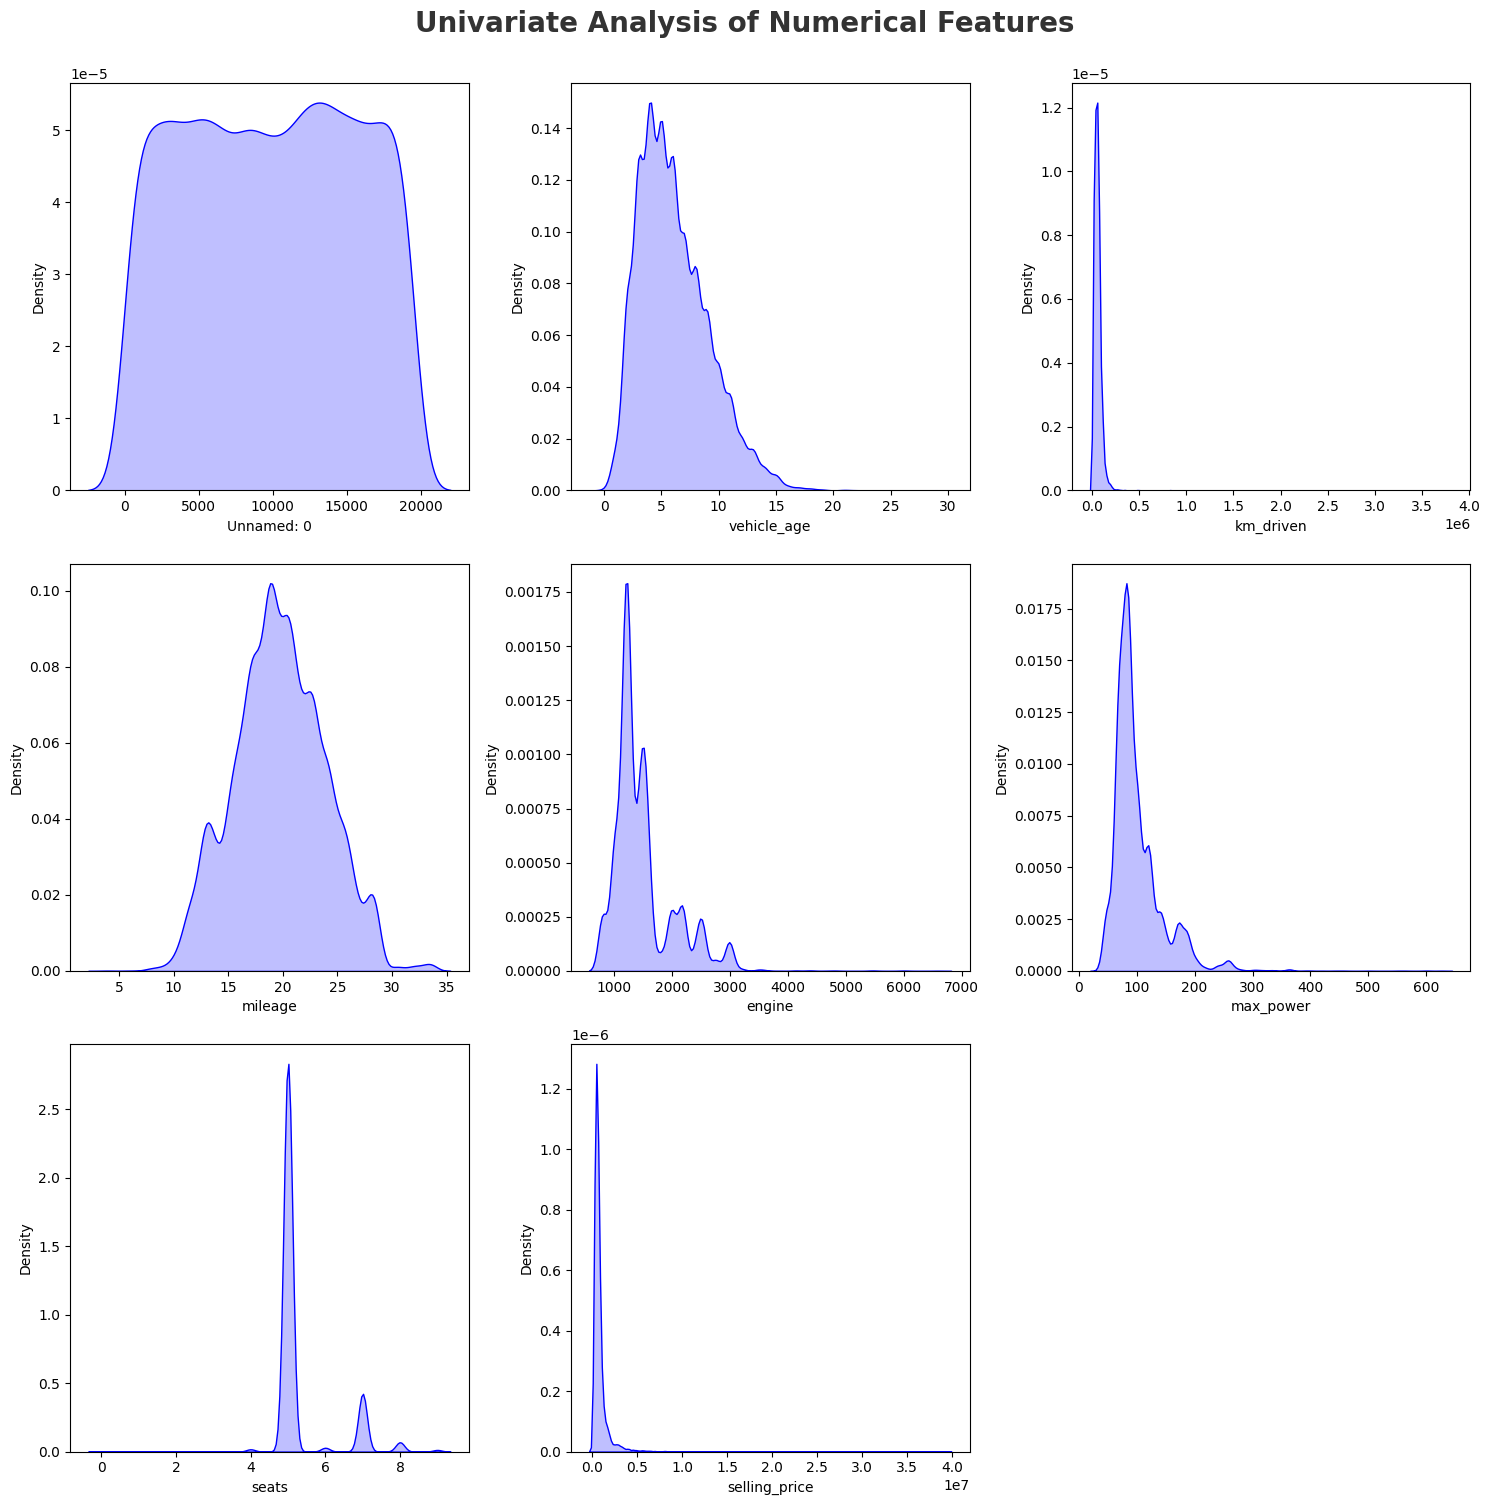

In [10]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

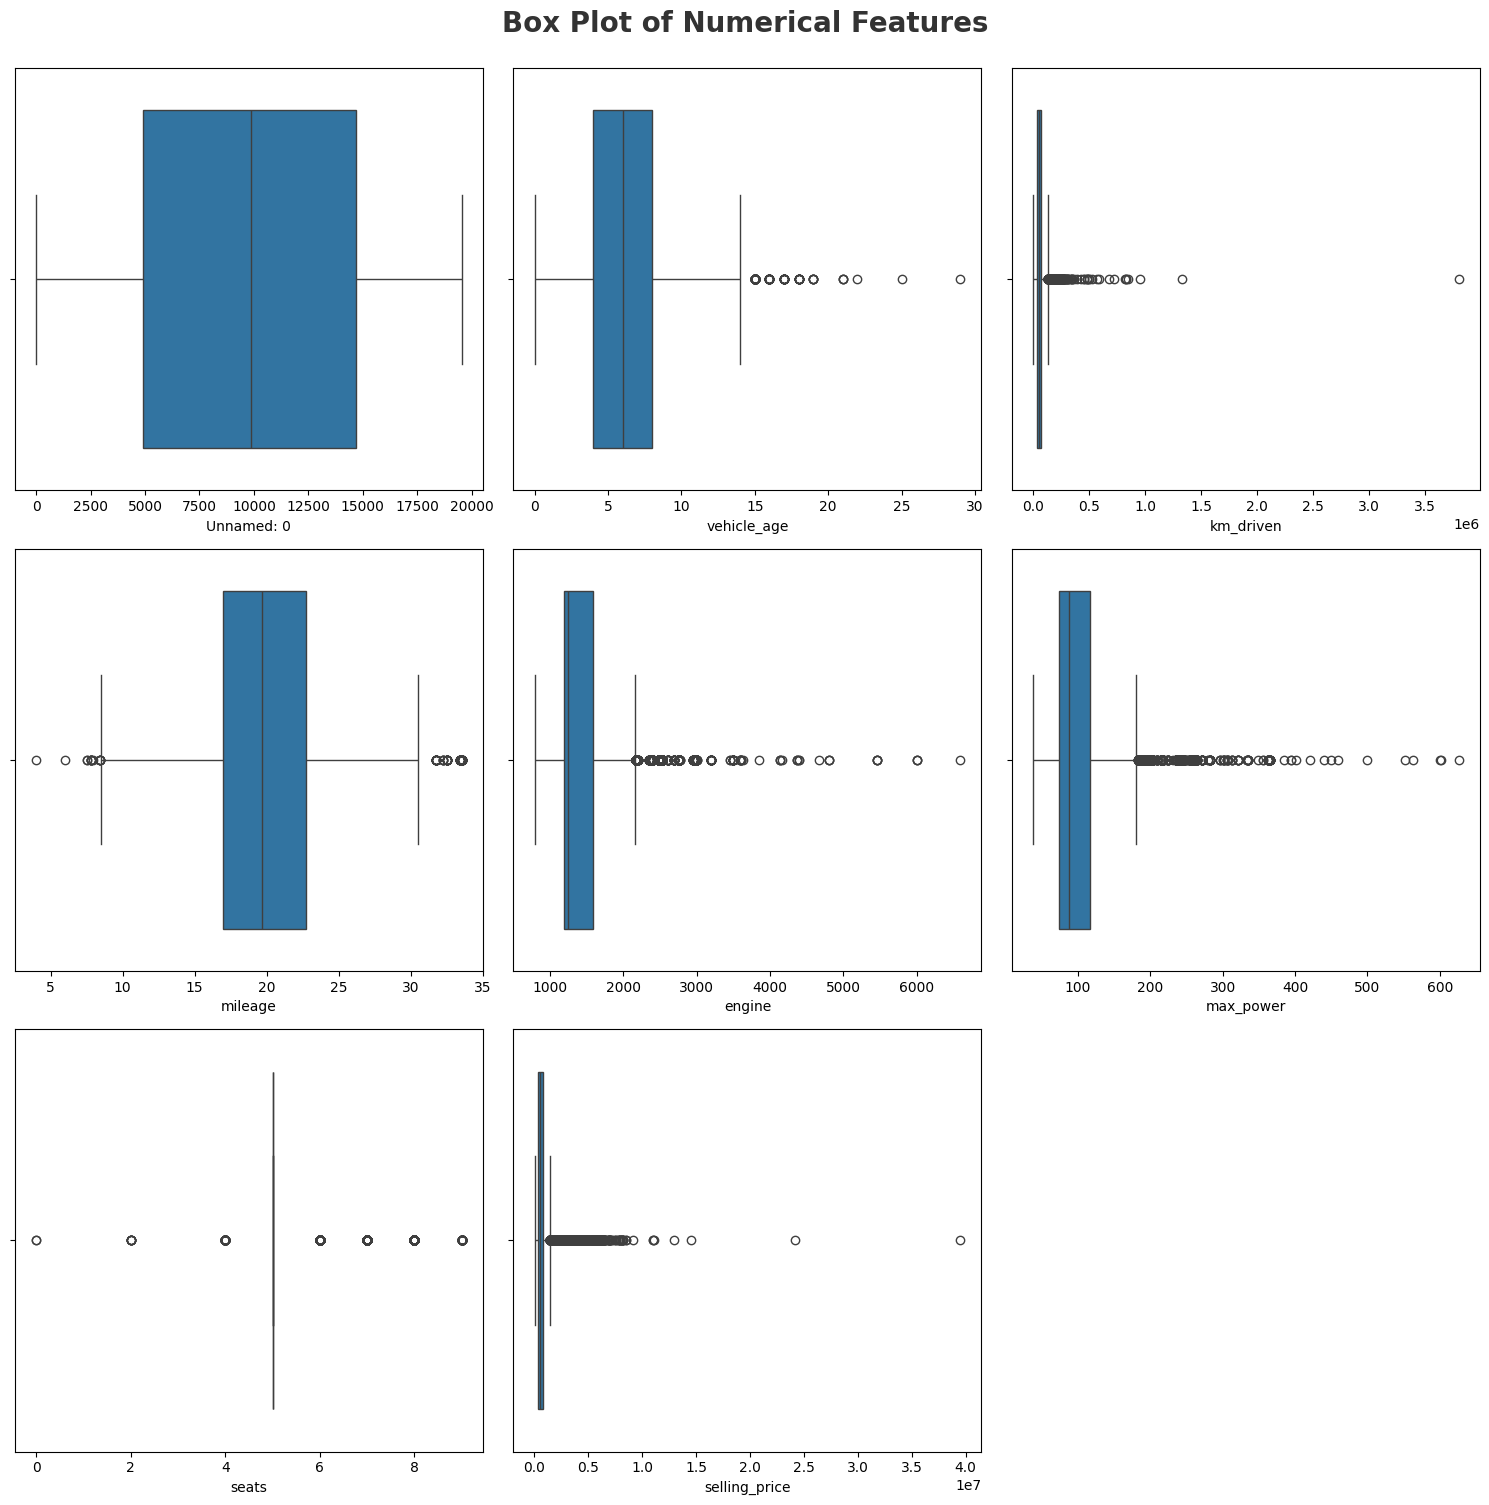

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Given the nature of the data and the potential impact of outliers on a machine learning model, we'll adopt a combination of capping and flooring to handle the outliers. This approach will help retain the information contained in these extreme values while mitigating their undue influence on the model.

We'll cap the outliers at the 95th percentile and floor them at the 5th percentile. This means that any values above the 95th percentile will be replaced with the value at the 95th percentile, and any values below the 5th percentile will be replaced with the value at the 5th percentile.

This approach is chosen because:

km_driven, engine, max_power, selling_price: These are likely to have genuine extreme values (very expensive cars, very powerful engines). Capping and flooring preserves these extremes while limiting their influence.
mileage: While outliers here might be errors, flooring at the 5th percentile (instead of removing) prevents losing information about unusually fuel-efficient cars.

In [12]:
#handling outliers :
# List of columns to check for outliers
columns_to_check = ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

# Cap and floor outliers
for col in columns_to_check:
    # Calculate 95th and 5th percentile
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)

    # Cap and floor values
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))

Report :
Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
Outliers in km_driven, enginer, selling_price, and max power.

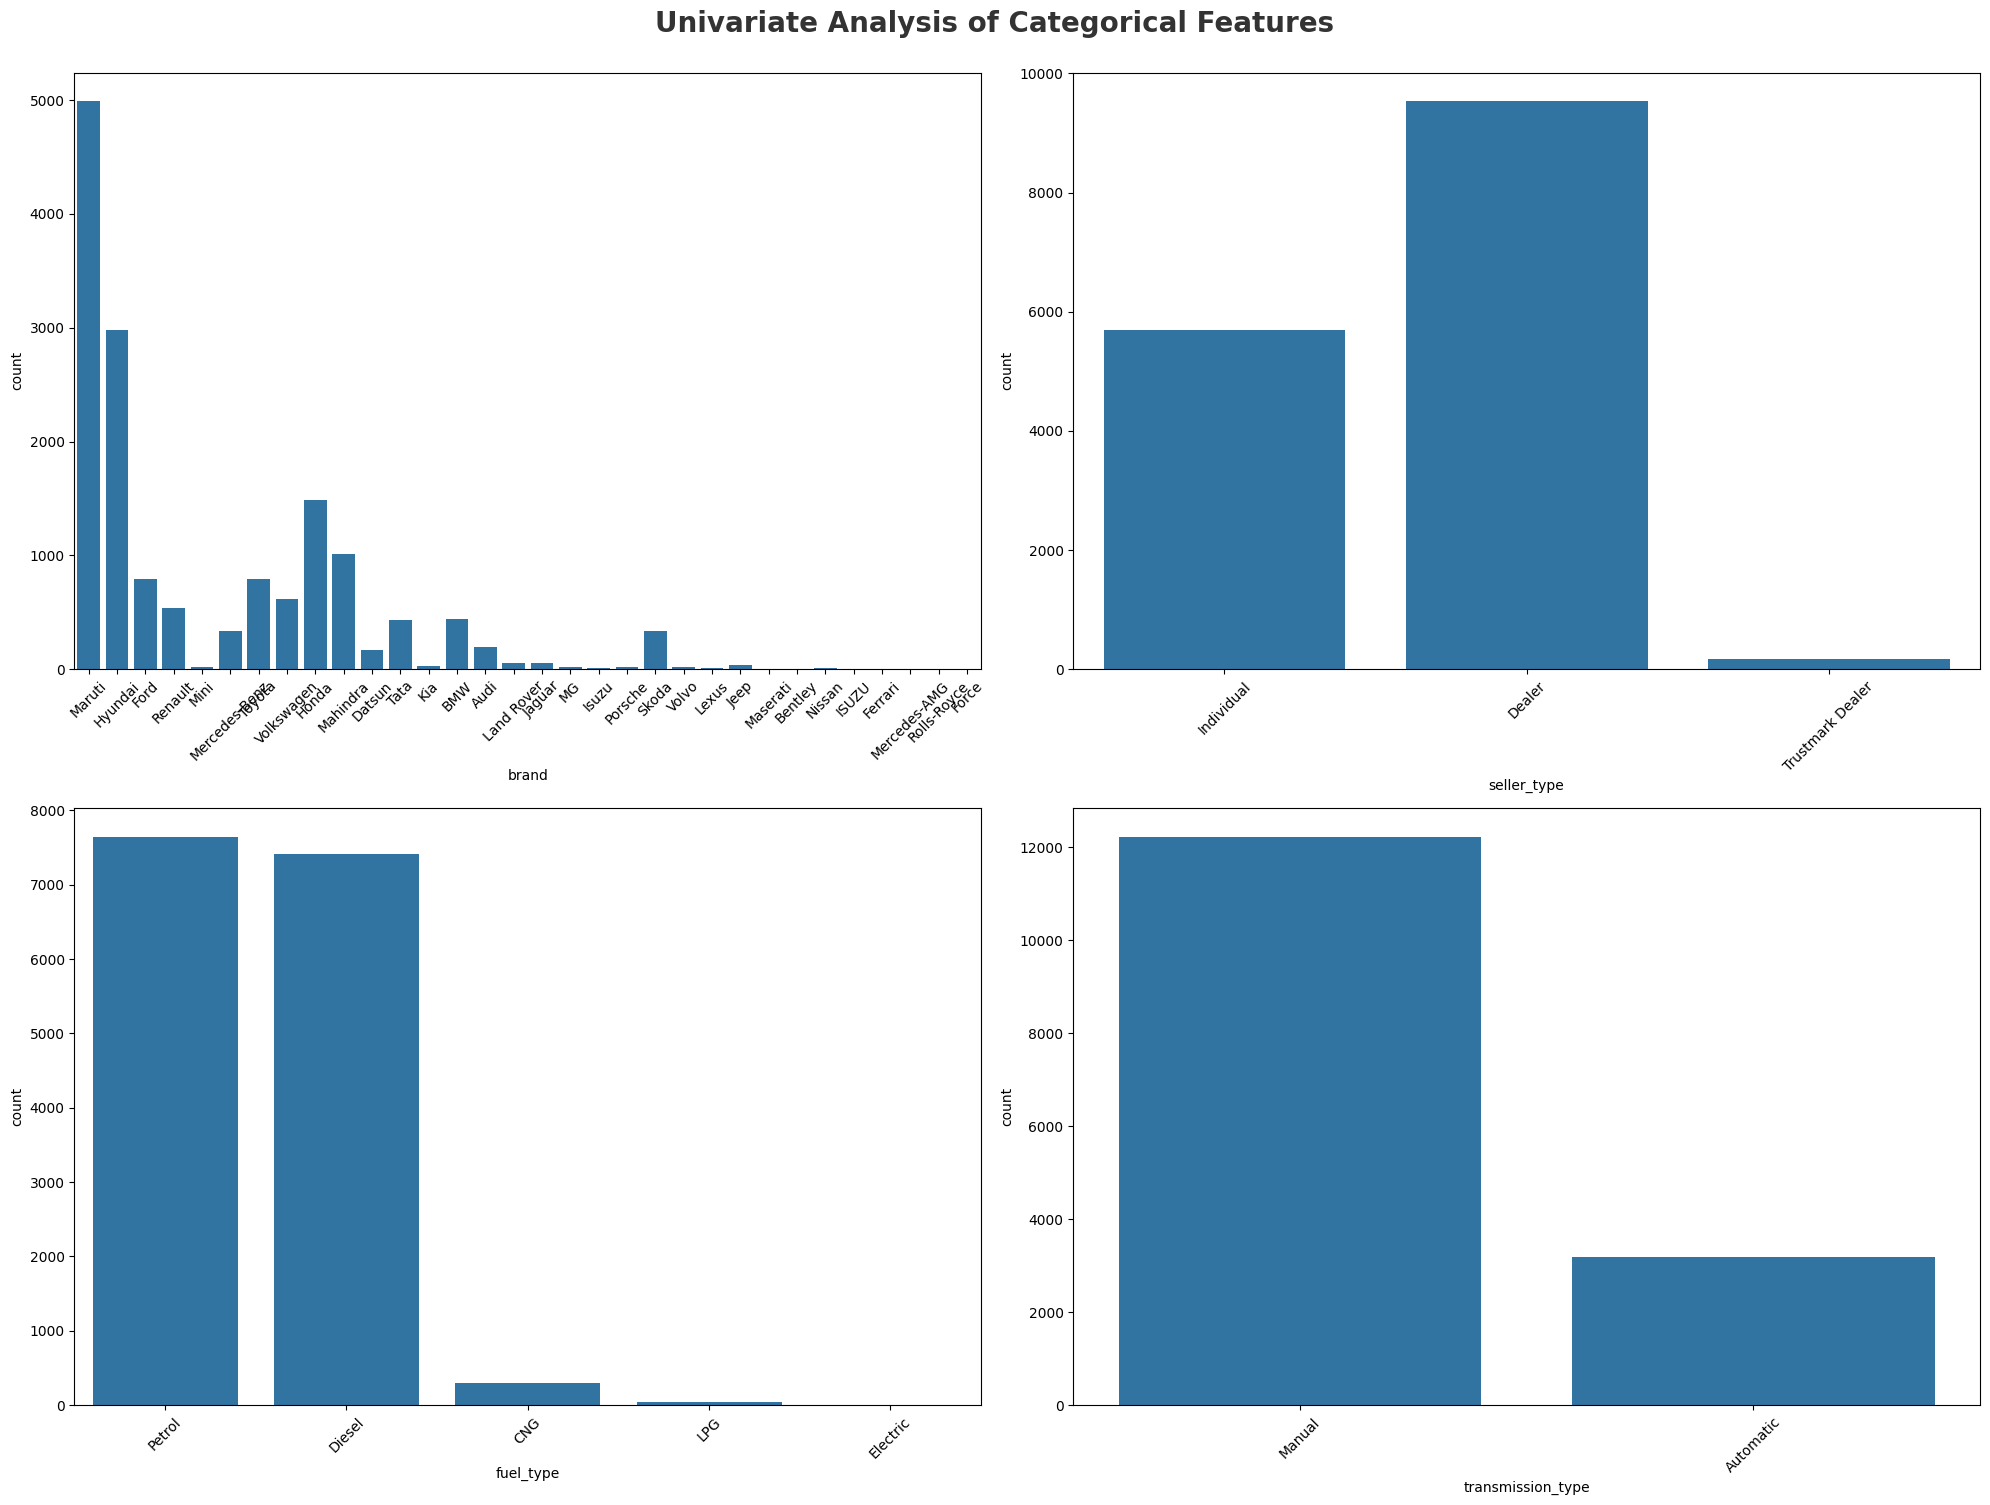

In [13]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

(5.2) Bivariate Analysis

In [14]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


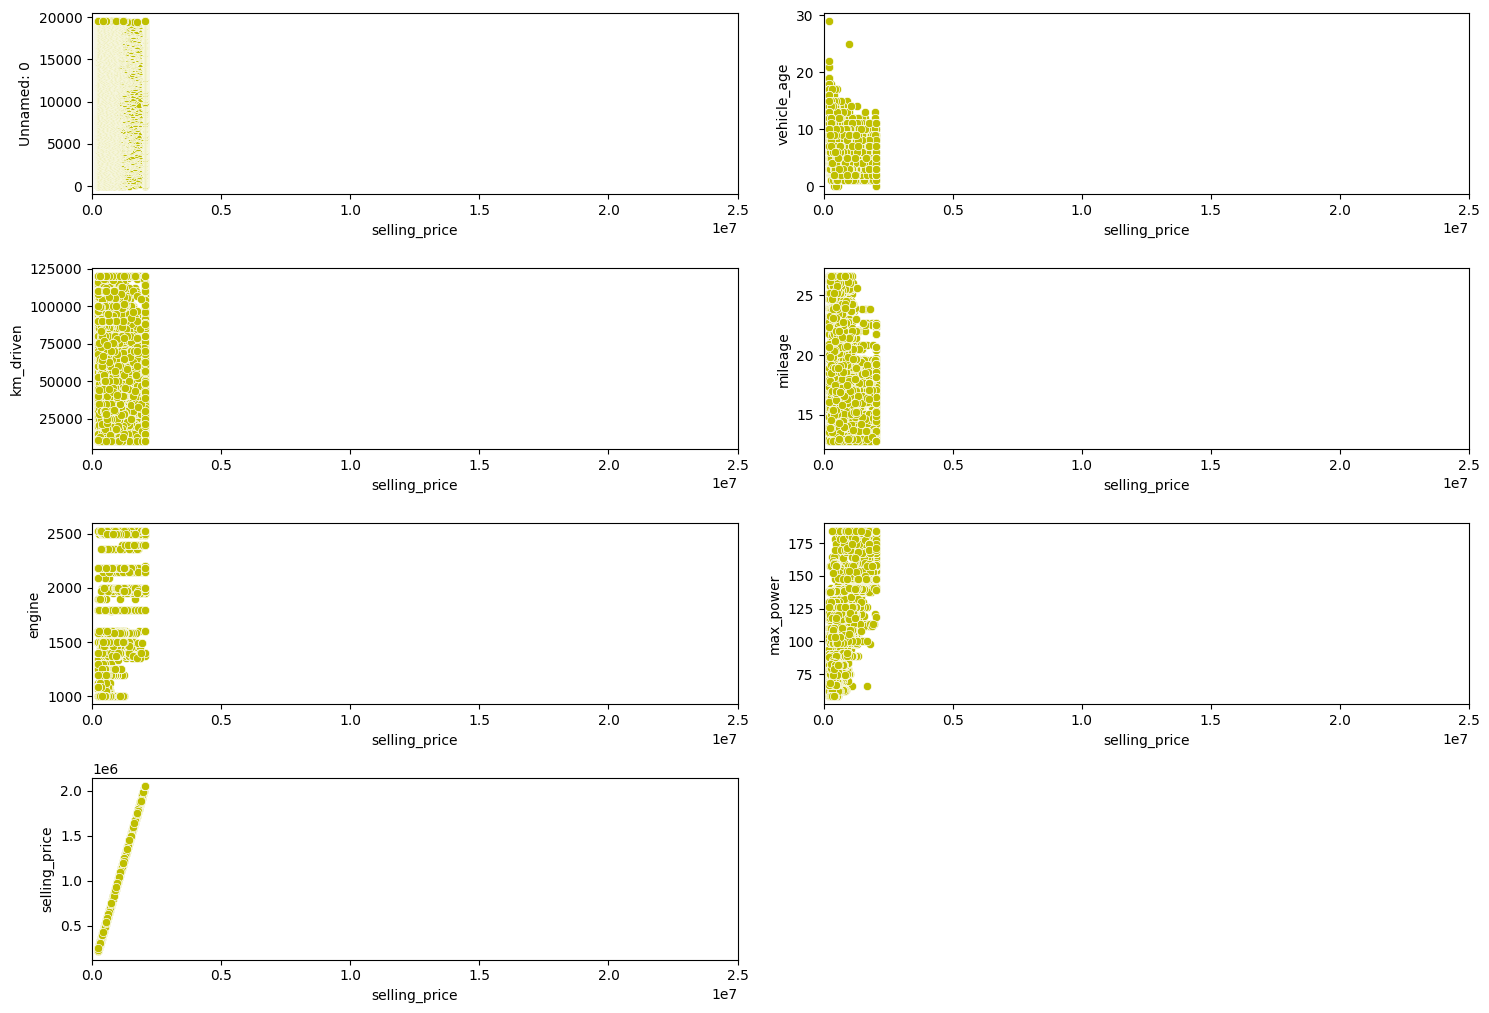

In [15]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data=df ,x='selling_price', y=continuous_features[i], color='y')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

Inference :
Lower Vehicle age has more selling price than Vehicle with more age.
Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
Kms Driven has negative effect on selling price.

(5.3) Multivariate Analysis¶
Check Multicollinearity in Numerical features

In [16]:
df[numeric_features].corr()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
Unnamed: 0,1.000000,-0.006250,-0.016624,-0.015699,0.011146,0.042794,-0.031832,0.040130
vehicle_age,-0.006250,1.000000,0.514844,-0.257662,0.103419,-0.008763,0.030791,-0.336473
km_driven,-0.016624,0.514844,1.000000,-0.125306,0.270884,0.078306,0.240481,-0.120835
mileage,-0.015699,-0.257662,-0.125306,1.000000,-0.638877,-0.545422,-0.450242,-0.375727
engine,0.011146,0.103419,0.270884,-0.638877,1.000000,0.773808,0.603465,0.668625
max_power,0.042794,-0.008763,0.078306,-0.545422,0.773808,1.000000,0.227352,0.820979
seats,-0.031832,0.030791,0.240481,-0.450242,0.603465,0.227352,1.000000,0.238008
selling_price,0.040130,-0.336473,-0.120835,-0.375727,0.668625,0.820979,0.238008,1.000000


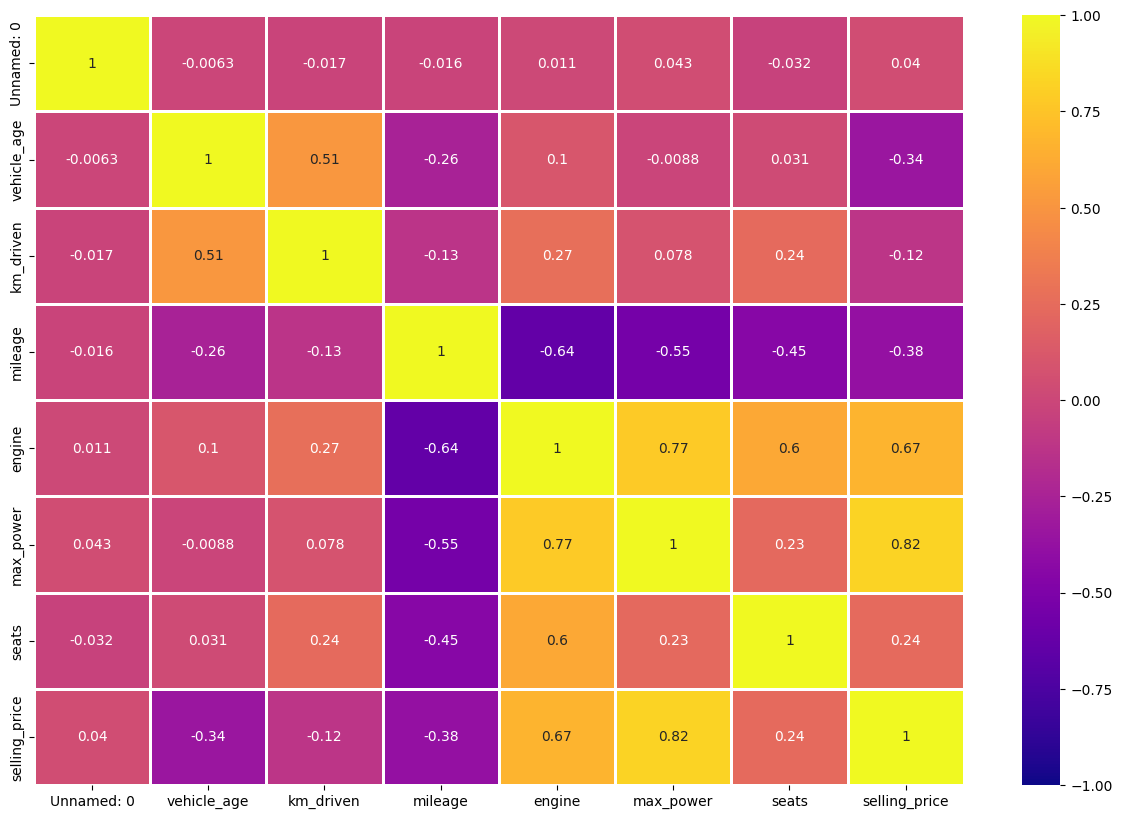

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

Inference :
Max Power and Engine are highly correlated
Max Power and Selling Price are highly correlated.

Now Check Multicollinearity for Categorical features :

In [18]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :\n',test_result)

Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
   Categorical Features       Hypothesis Result
0             car_name  Reject Null Hypothesis
1                brand  Reject Null Hypothesis
2                model  Reject Null Hypothesis
3          seller_type  Reject Null Hypothesis
4            fuel_type  Reject Null Hypothesis
5    transmission_type  Reject Null Hypothesis


6) Insights from Data Visualization
Selling Price Distribution (Target Feature Distribution)

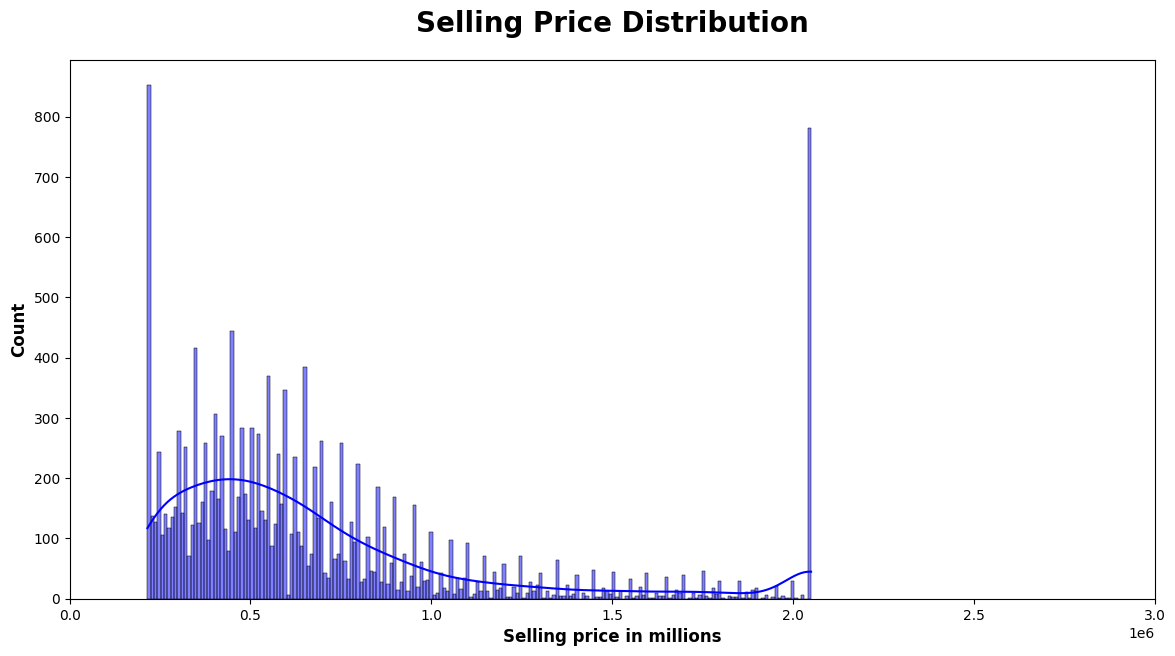

In [19]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

From the chart it is clear that the Target Variable Skewed

In [20]:
print('Top 10 Sold Cars on CarDekho Website')
df.car_name.value_counts()[0:10]

Top 10 Sold Cars on CarDekho Website


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

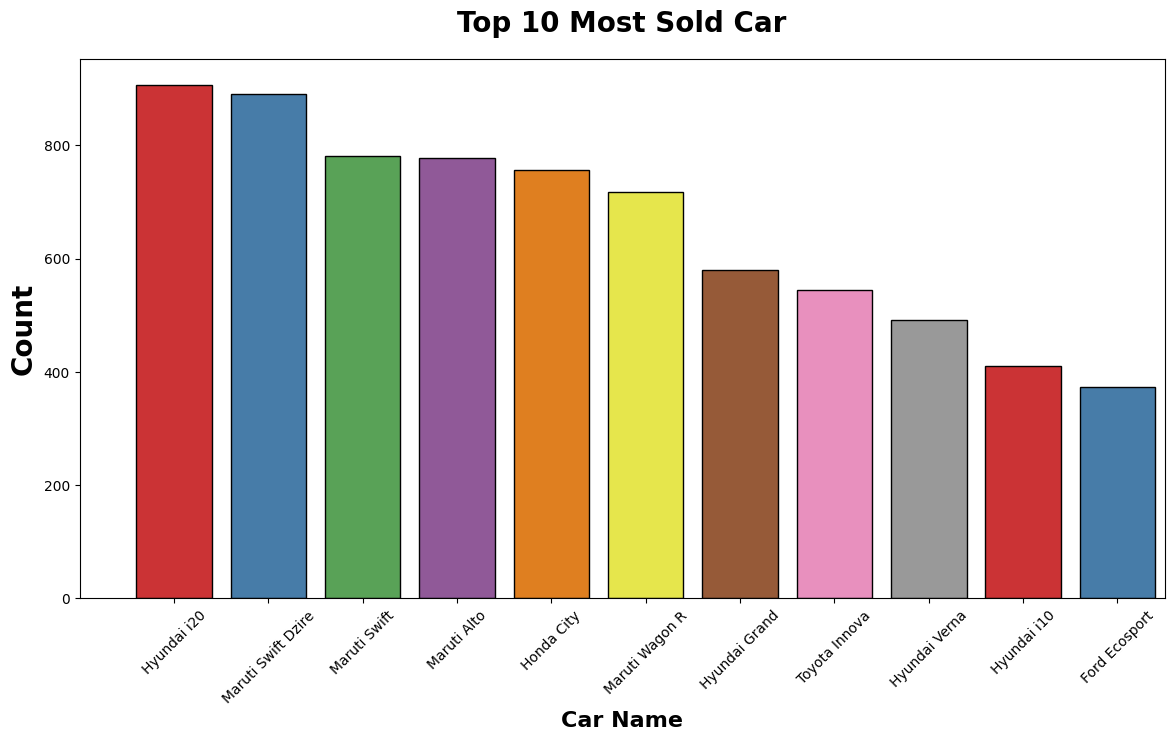

In [21]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [22]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543842.16 Rupees


Inference :
As per the Chart these are top 10 most selling cars in used car website.
Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
Mean Price of Most Sold Car is 5.4 lakhs.
This Feature has impact on the Target Variable.

In [23]:
print('Top 10 Most Sold Car Brand')
df.brand.value_counts()[0:10]

Top 10 Most Sold Car Brand


brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

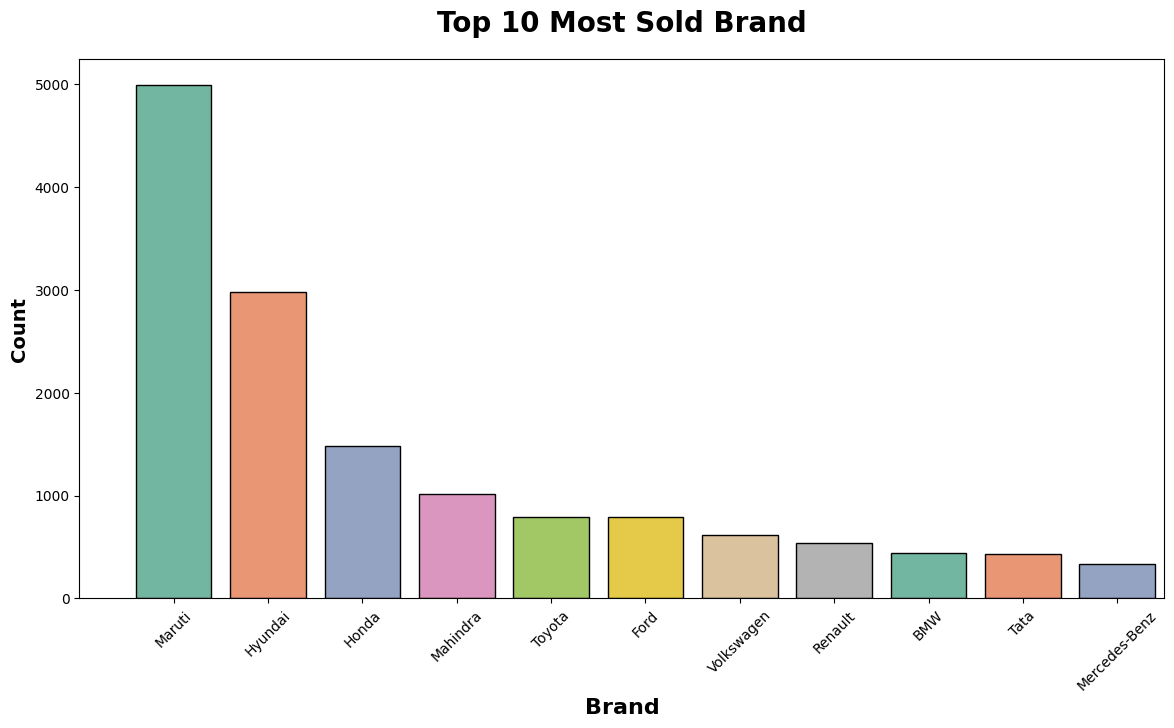

In [24]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [25]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 492913.66 Rupees


Inference :
As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
Following Maruti we have Hyundai and Honda.
Mean Price of Maruti Brand is 4.8 lakhs.

In [26]:
#Costlier Brand on CarDekho Website
print('Top 10 Costlier Brands on CarDekho Website')
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand

Top 10 Costlier Brands on CarDekho Website


,selling_price
brand,
Audi,2050000.0
BMW,2050000.0
Bentley,2050000.0
Ferrari,2050000.0
Honda,2050000.0
Ford,2050000.0
Isuzu,2050000.0
Hyundai,2050000.0
Land Rover,2050000.0


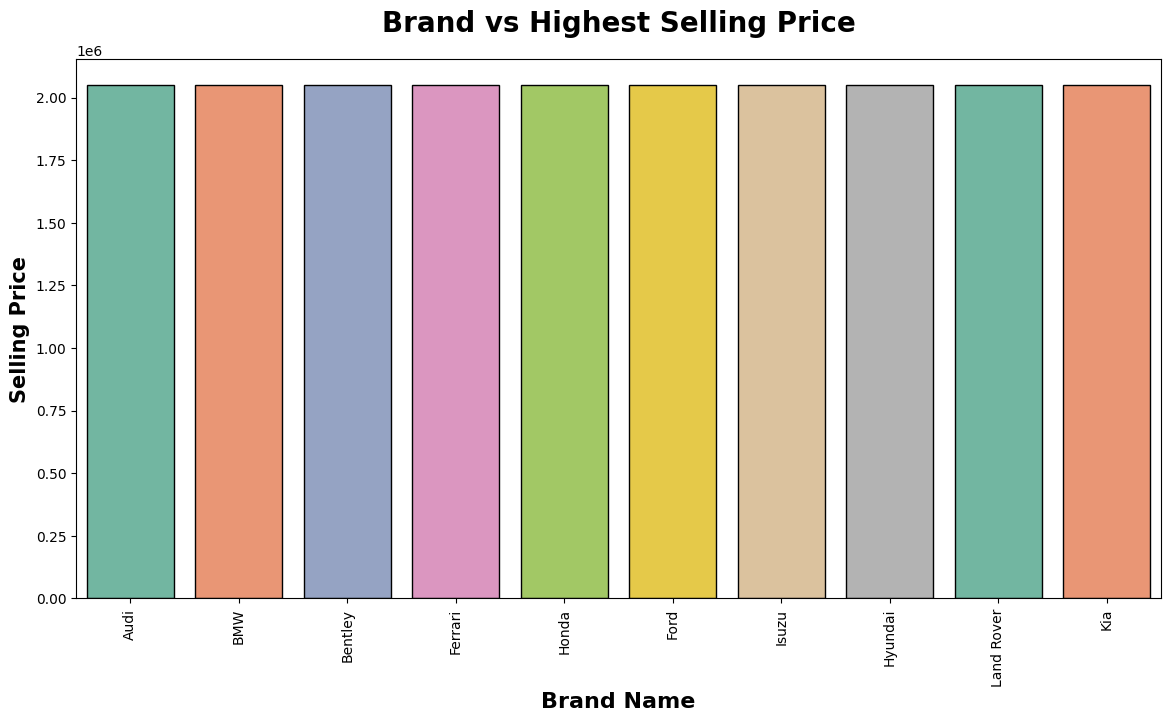

In [27]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Inference
Costliest Brand sold is Ferrari at 3.95 Crores.
Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
Brand name has very clear impact on selling price.

In [28]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
print('Top 10 Costlier Cars on CarDekho Website')
car

Top 10 Costlier Cars on CarDekho Website


,selling_price
car_name,
Audi A4,2050000.0
Audi A6,2050000.0
Audi A8,2050000.0
Audi Q7,2050000.0
BMW 3,2050000.0
BMW 5,2050000.0
BMW 6,2050000.0
BMW 7,2050000.0
BMW X1,2050000.0


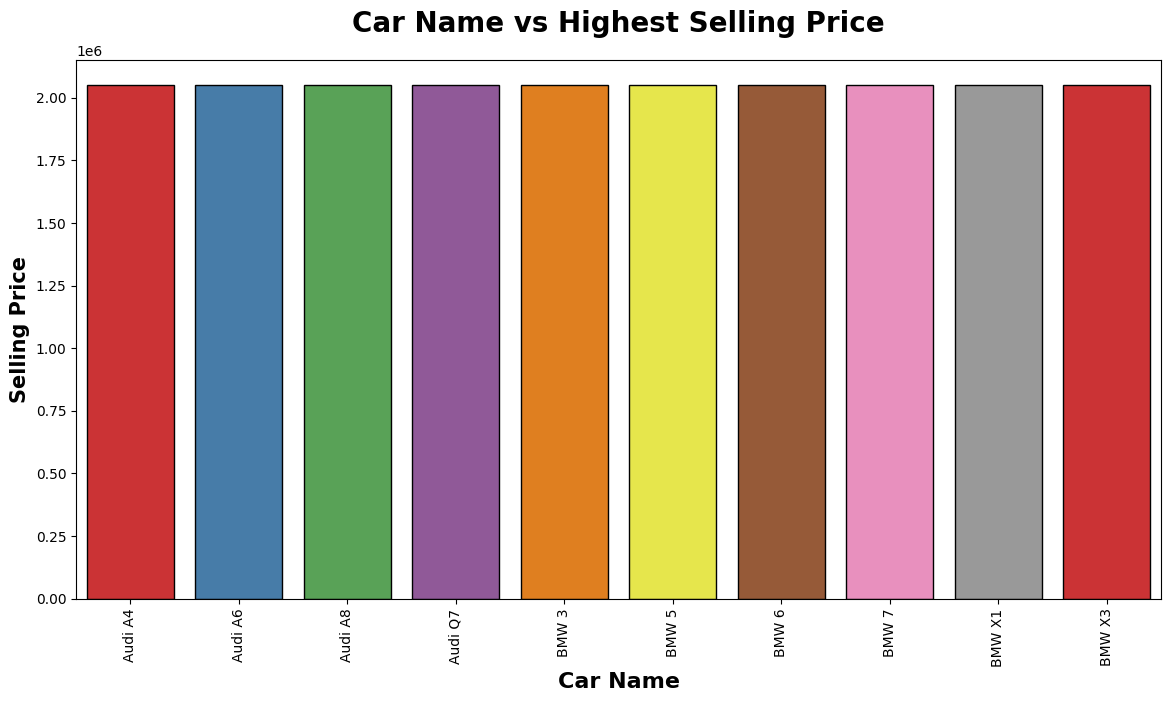

In [29]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

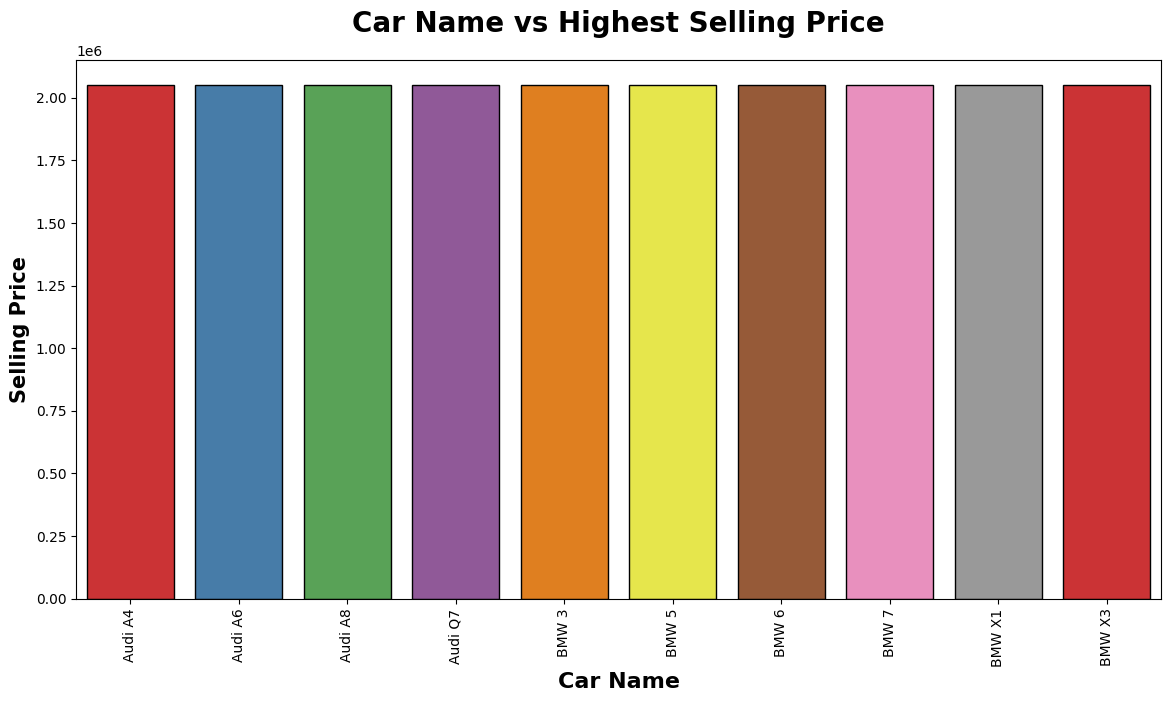

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Inference
Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
Ferrari selling price is 3.95 Crs.
Other than Ferrari other car has priced below 1.5cr.

In [31]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
print('Most Mileage Car Brand on CarDekho Website')
mileage.to_frame()

Most Mileage Car Brand on CarDekho Website


,mileage
brand,
Maruti,22.171707
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.998380
Honda,19.904673
Maserati,19.820000
Tata,19.762256
Hyundai,19.581566


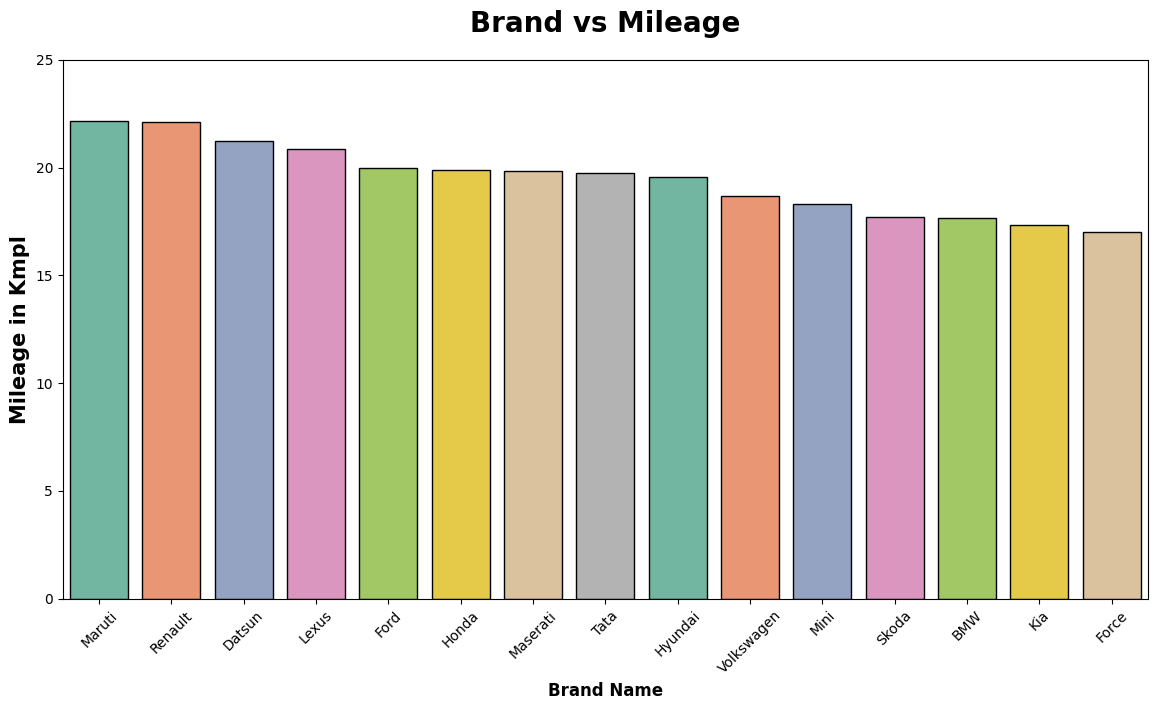

In [32]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

In [33]:
mileage_Car= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
print('Most Mileage Car on CarDekho Website')
mileage_Car.to_frame()

Most Mileage Car on CarDekho Website


,mileage
car_name,
Tata Tiago,24.468069
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Ciaz,23.697457
Maruti Dzire VXI,23.512941
Maruti Celerio,23.264219
Maruti Dzire ZXI,23.260000
Maruti Dzire LXI,23.260000
Ford Aspire,22.993846


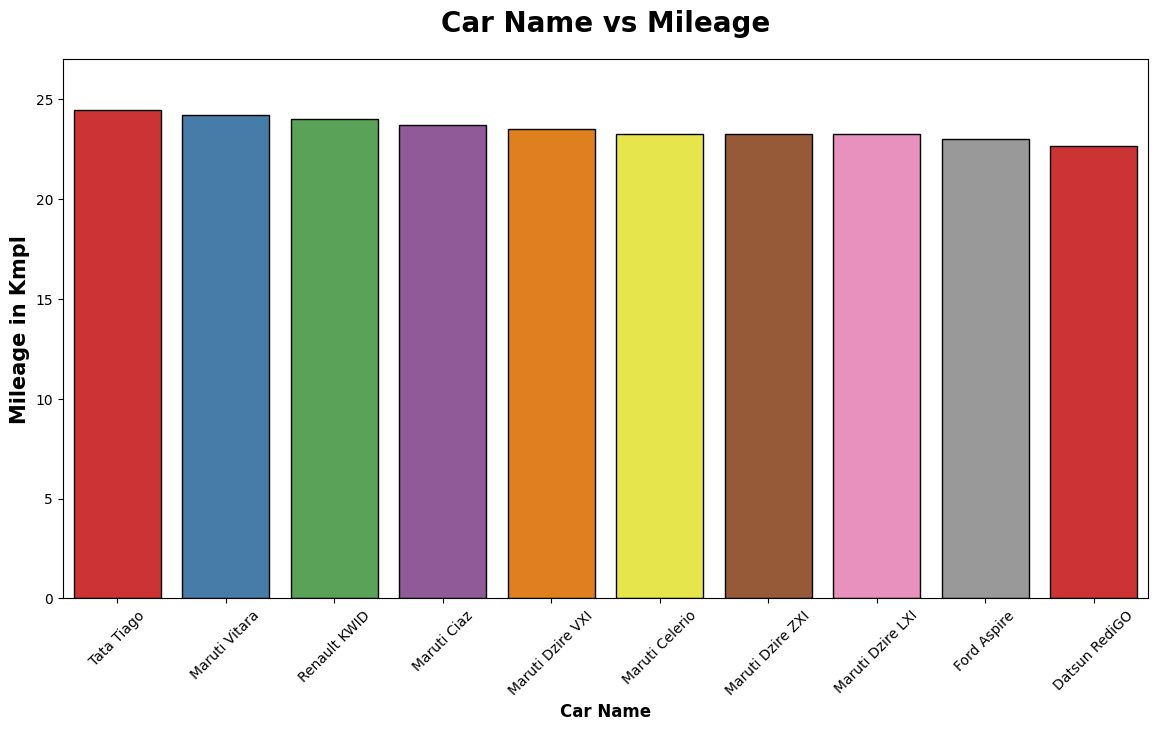

In [34]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_Car.index, y=mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

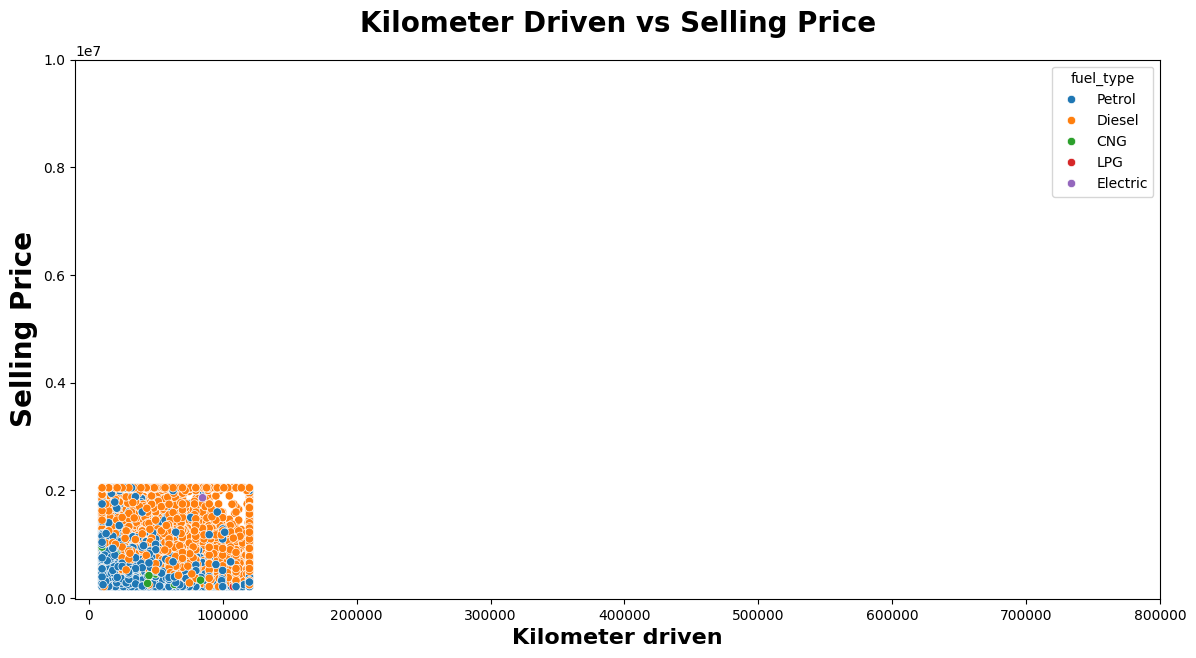

In [35]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

Inference:
Many Cars were sold with kms between 0 to 20k Kilometers
Low Kms driven cars had more selling price compared to cars which had more kms driven.

In [36]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,215000.0


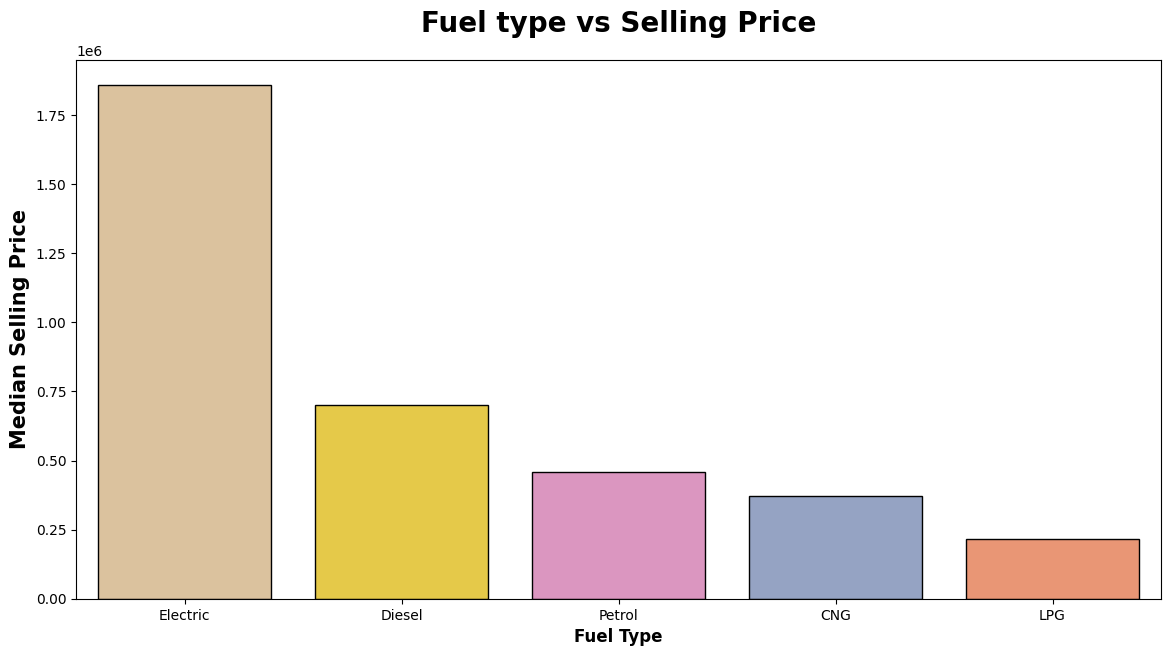

In [37]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

Inference
Electric cars have highers selling average price.
Followed by Diesel and Petrol.
Fuel Type is also important feature for the Target variable.

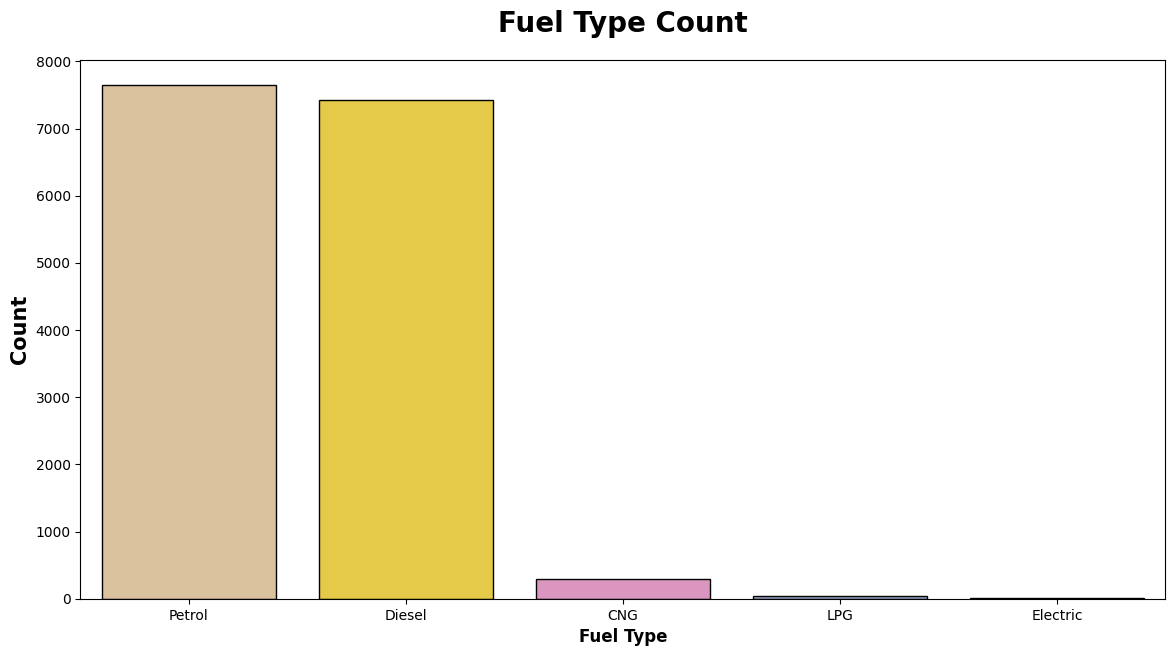

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

Inference
Petrol and Diesel dominate the used car market in the website.
The most sold fuel type Vechicle is Petrol.
Followed by diesel and CNG and least sold is Electric

In [39]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,24.037276
Diesel,20.019732
Petrol,19.167911
Electric,19.160000
LPG,17.836364


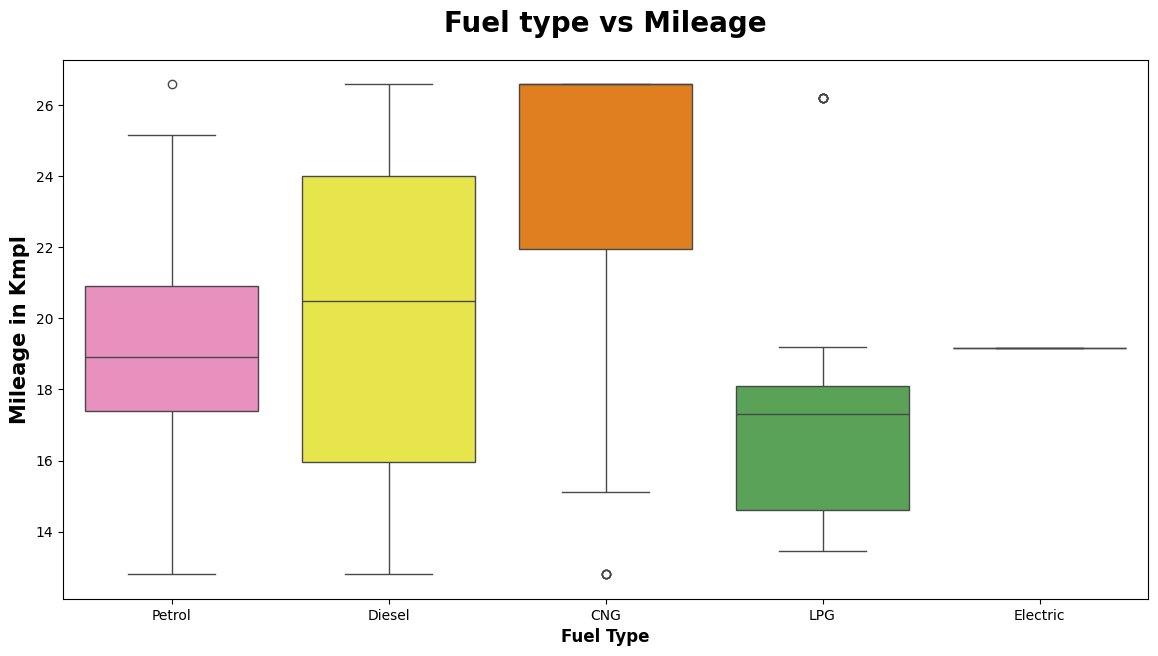

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

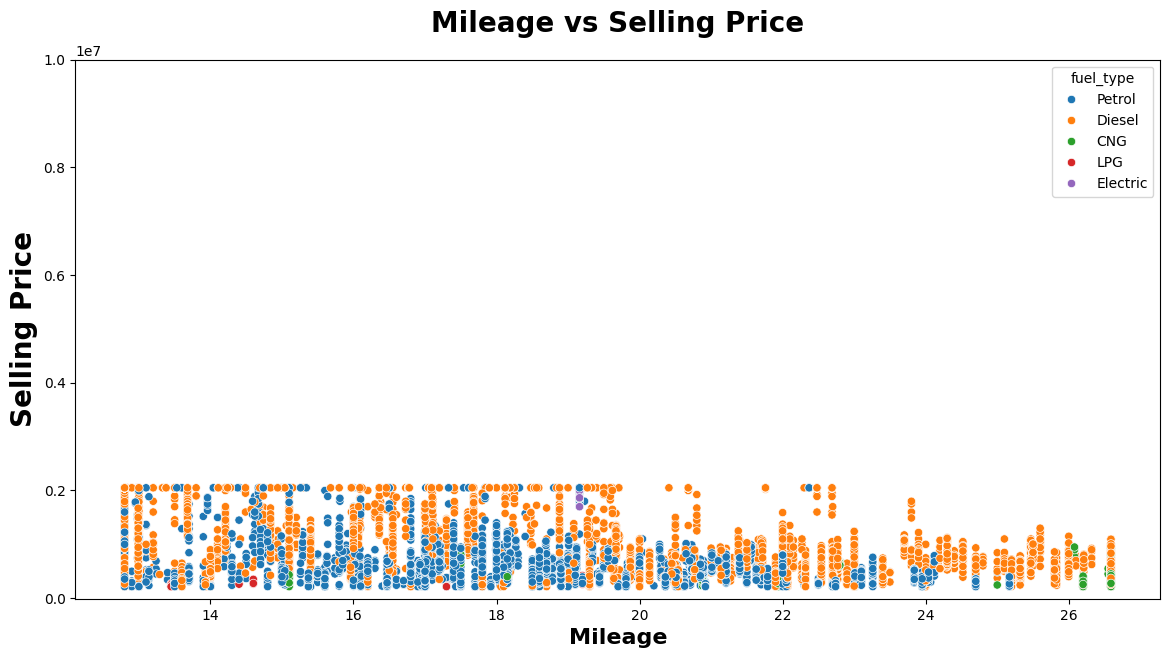

In [41]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

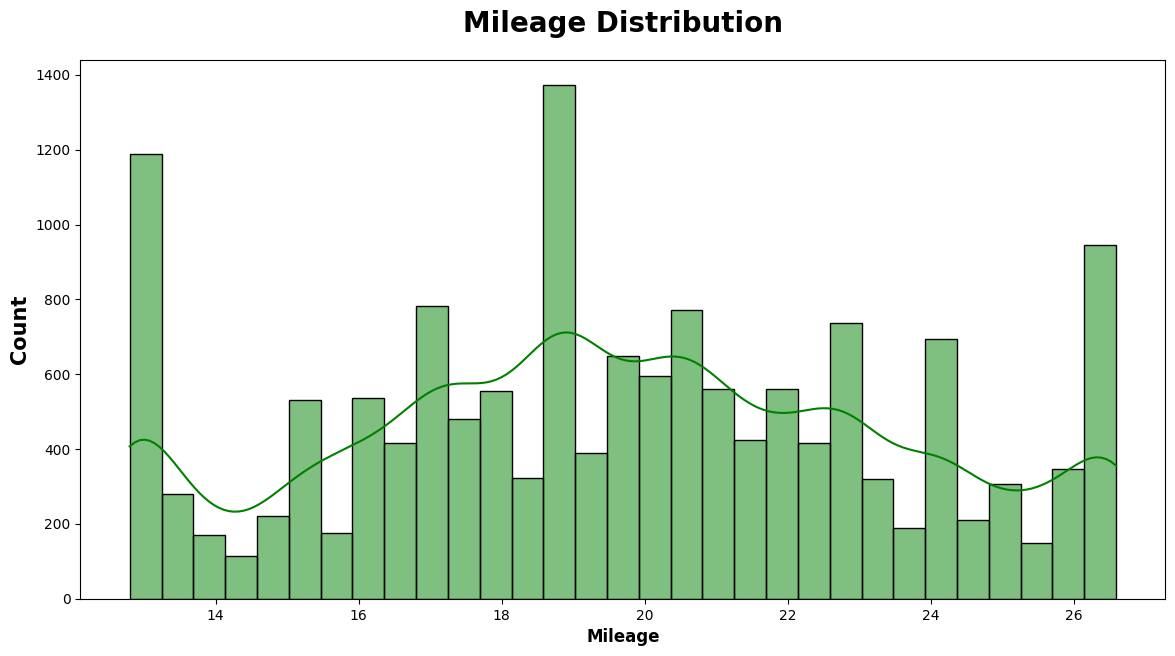

In [42]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

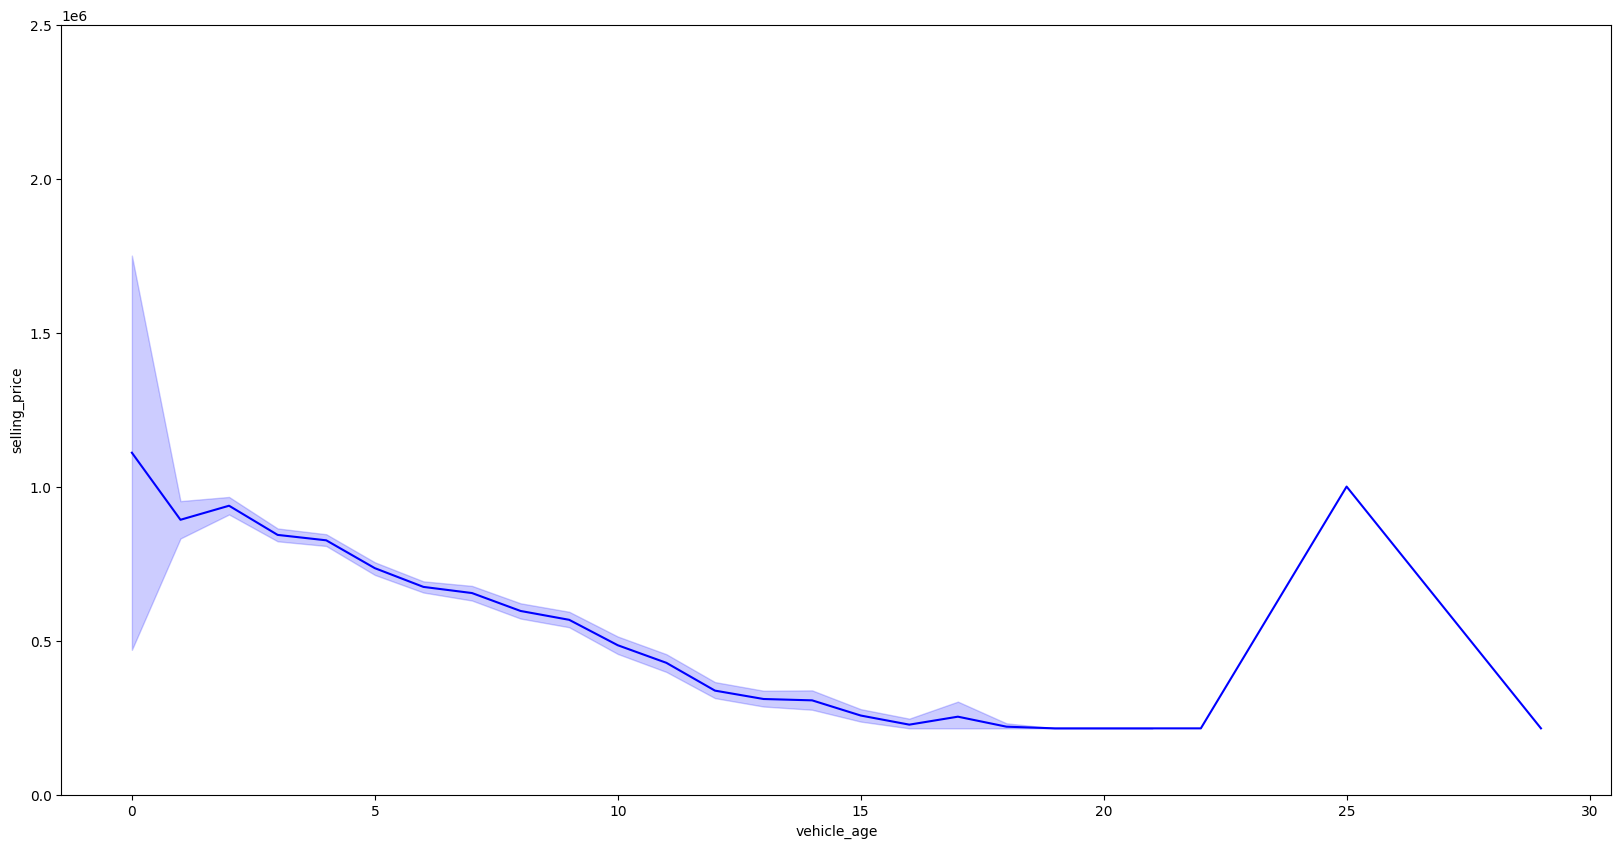

In [43]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

Inference
As the Vehicle age increases the price also get reduced.
Vehicle age has Negative impact on selling price

In [44]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


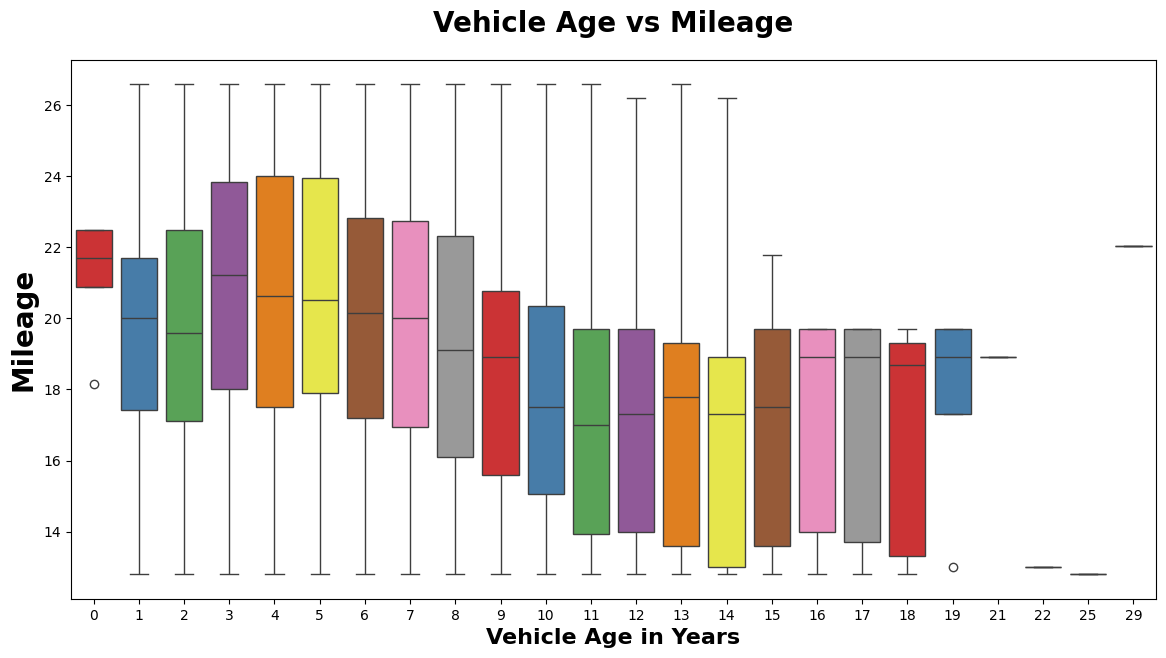

In [45]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

Inference
As the Age of vehicle increases the median of mileage drops.
Newer Vehicles have more mileage median older vehicle.

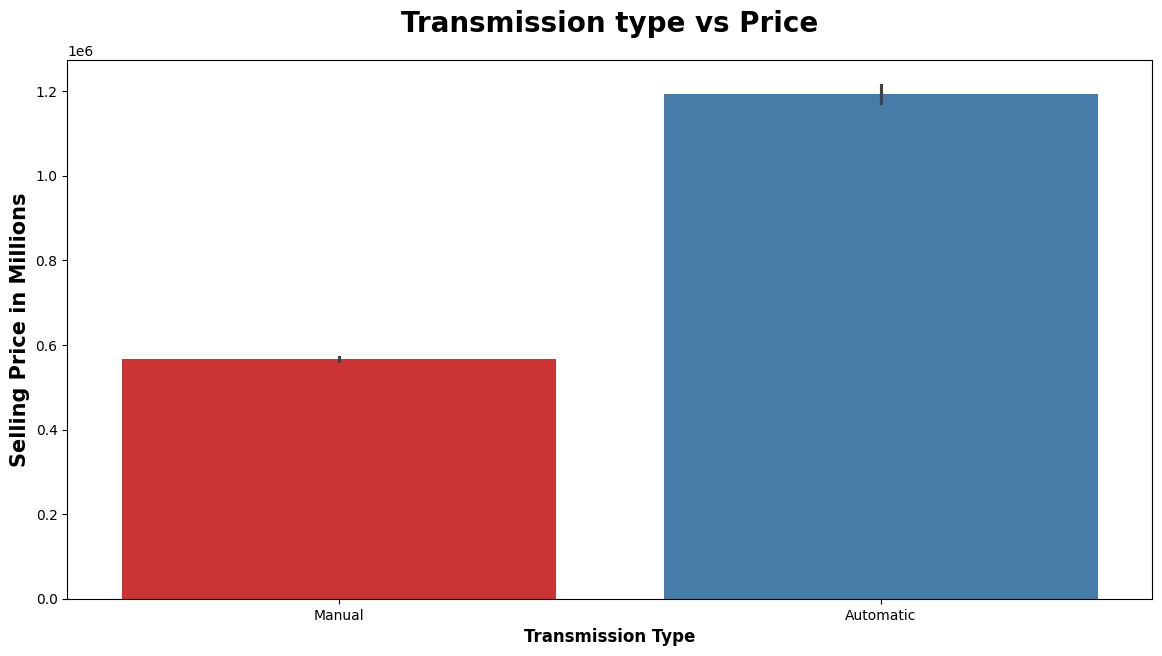

In [46]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

Inference
Manual Transmission was found in most of the cars which was sold.
Automatic cars have more selling price than manual cars.

In [47]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


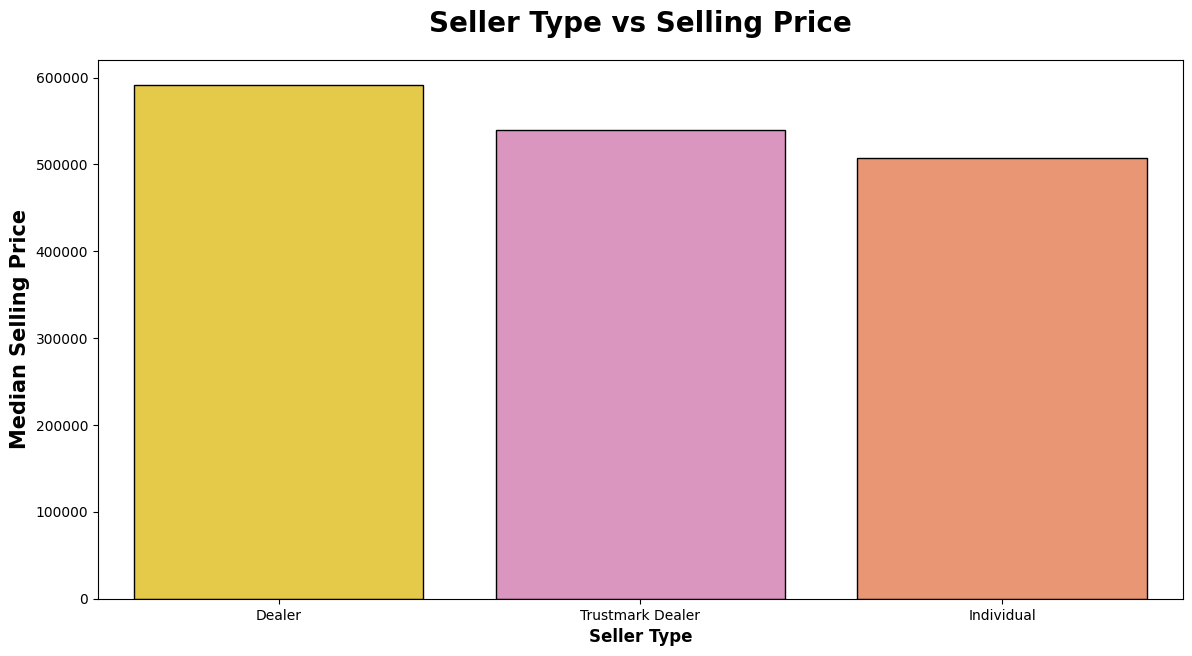

In [48]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

Final Report:
The datatypes and Column names were right and there was 15411 rows and 13 columns
The selling_price column is the target to predict. i.e Regression Problem.
There are outliers in the km_driven, enginer, selling_price, and max power.
Dealers are the highest sellers of the used cars.
Skewness is found in few of the columns will check it after handling outliers.
Vehicle age has negative impact on the price.
Manual cars are mostly sold and automatic has higher selling average than manual cars.
Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
We just need less data cleaning for this dataset.


7) Feature Engineering

In [49]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000.0,Individual,Petrol,Manual,19.70,998.0,58.16,5,215000.0
1,1,Hyundai Grand,Hyundai,Grand,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000.0
2,2,Hyundai i20,Hyundai,i20,11,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000.0
3,3,Maruti Alto,Maruti,Alto,9,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000.0
4,4,Ford Ecosport,Ford,Ecosport,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000.0


Removing unnecessary features:Dropping car_name ,brand and model,Unnamed: 0

These features are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the car_name ,brand and model, we can create a model that is more accurate and reliable.

In [50]:
# Creating copy of  original dataframe
df_model=df.copy()
df_model

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000.0,Individual,Petrol,Manual,19.70,998.0,58.16,5,215000.0
1,1,Hyundai Grand,Hyundai,Grand,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000.0
2,2,Hyundai i20,Hyundai,i20,11,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000.0
3,3,Maruti Alto,Maruti,Alto,9,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000.0
4,4,Ford Ecosport,Ford,Ecosport,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723.0,Dealer,Petrol,Manual,19.81,1086.0,68.05,5,250000.0
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000.0,Dealer,Petrol,Manual,17.50,1373.0,91.10,7,925000.0
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000.0,Dealer,Diesel,Manual,21.14,1498.0,103.52,5,425000.0
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,120000.0,Dealer,Diesel,Manual,16.00,2179.0,140.00,7,1225000.0


In [51]:
df_model.drop(labels=['car_name','brand','model','Unnamed: 0'],axis=1,inplace=True)

df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000.0,Individual,Petrol,Manual,19.70,998.0,58.16,5,215000.0
1,5,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000.0
2,11,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000.0
3,9,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000.0
4,6,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000.0
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723.0,Dealer,Petrol,Manual,19.81,1086.0,68.05,5,250000.0
15407,2,18000.0,Dealer,Petrol,Manual,17.50,1373.0,91.10,7,925000.0
15408,6,67000.0,Dealer,Diesel,Manual,21.14,1498.0,103.52,5,425000.0
15409,5,120000.0,Dealer,Diesel,Manual,16.00,2179.0,140.00,7,1225000.0


In [52]:
#Converting Categorical Columns into numerical:Using One Hot Encoding (get_dummies)
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000.0,19.70,998.0,58.16,5,215000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000.0,18.90,1197.0,82.00,5,550000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000.0,17.00,1197.0,80.00,5,215000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000.0,20.92,998.0,67.10,5,226000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000.0,22.77,1498.0,98.59,5,570000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723.0,19.81,1086.0,68.05,5,250000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000.0,17.50,1373.0,91.10,7,925000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000.0,21.14,1498.0,103.52,5,425000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,120000.0,16.00,2179.0,140.00,7,1225000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df_model['seller_type_Trustmark Dealer'].value_counts()

seller_type_Trustmark Dealer
0.0    15238
1.0      173
Name: count, dtype: int64

In [54]:
df_model.dtypes

vehicle_age                       int64
km_driven                       float64
mileage                         float64
engine                          float64
max_power                       float64
seats                             int64
selling_price                   float64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

In [55]:
#Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000.0,19.70,998.0,58.16,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000.0,18.90,1197.0,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000.0,17.00,1197.0,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000.0,20.92,998.0,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000.0,22.77,1498.0,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723.0,19.81,1086.0,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000.0,17.50,1373.0,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000.0,21.14,1498.0,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,120000.0,16.00,2179.0,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
y=df_model['selling_price']    # Target Variable
y

0         215000.0
1         550000.0
2         215000.0
3         226000.0
4         570000.0
           ...    
15406     250000.0
15407     925000.0
15408     425000.0
15409    1225000.0
15410    1200000.0
Name: selling_price, Length: 15411, dtype: float64

In [57]:
#Checking for important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print('Checking for feature importance')
print(model.feature_importances_)

Checking for feature importance
[1.53262256e-01 3.98785032e-02 2.30307489e-02 1.10632104e-01
 5.63016315e-01 8.22828196e-03 2.58336916e-03 2.54777644e-03
 8.64910546e-05 2.44030352e-04 1.18158248e-02 2.05922353e-05
 4.23797992e-06 9.81440241e-03 4.20592325e-02 3.27758345e-02]


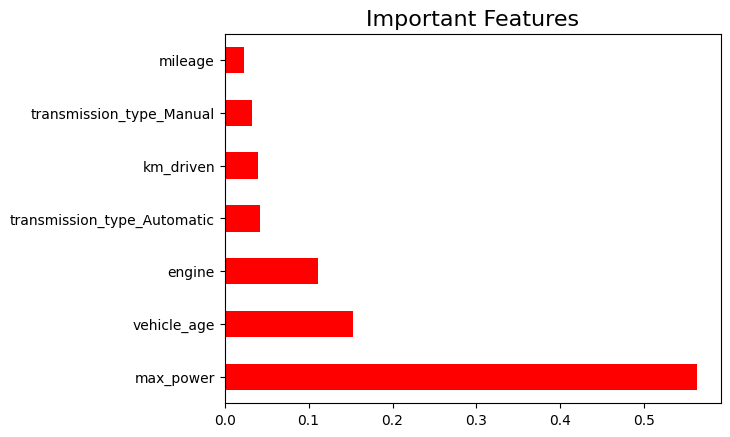

In [58]:
#Visulization for feature importance:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

8)Model Building & Evaluation

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso, XGBRegressor]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [62]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso', 'XGBRegressor'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,3.914167e+10,197842.537256,0.821292,0.821217
Support Vector Rregression,2.369063e+11,486730.177670,0.000215,-0.082093
Decision Tree Regressor,2.131388e+10,145992.750003,0.902700,0.902647
Random Forest Regressor,1.302378e+10,114121.757362,0.940534,0.940513
Ridge,3.912630e+10,197803.687057,0.821365,0.821287
Lasso,3.914031e+10,197839.097213,0.821299,0.821223
XGBRegressor,1.191246e+10,109144.221521,0.945606,0.945589


(9)Selection of Best Model & Hyperparameter Tuning

XGBRegressor > Random Forest Regressor > Decision Tree Regressor >Linear Regression - Ridge - Lasso

In summary, the XGBRegressor performs best in predicting used car prices based on accuracy scores. However, model selection should consider interpretability, computational complexity and business requirements. XGBRegressor is a strong alternative offering good accuracy and interpretability. Support Vector Regression may capture complex relationships but has lower accuracy. Ridge and Lasso provide simpler linear models.

In [63]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
XGpred = XG.predict(X_test)
print('mean_squared_error',mean_squared_error(y_true= y_test, y_pred= XGpred))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_true= y_test, y_pred= XGpred)))
print('explained_variance_score',explained_variance_score(y_true= y_test, y_pred= XGpred))
print('r2_score',r2_score(y_true= y_test, y_pred= XGpred))

mean_squared_error 11912461091.471264
root_mean_squared_error 109144.2215212114
explained_variance_score 0.9456061358564215
r2_score 0.9455886698604453


In [64]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.25, 1]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y_train)
# Get the best model
best_model = grid_search.best_estimator_

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_dept

In [65]:
# Predict on the test set using the best model
best_XGpred = best_model.predict(X_test)

# Evaluate the performance
print('mean_squared_error',mean_squared_error(y_true= y_test, y_pred= best_XGpred))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_true= y_test, y_pred= best_XGpred)))
print('explained_variance_score',explained_variance_score(y_true= y_test, y_pred= best_XGpred))
print('r2_score',r2_score(y_true= y_test, y_pred= best_XGpred))

mean_squared_error 11825663906.93023
root_mean_squared_error 108745.8684591292
explained_variance_score 0.9460582706684938
r2_score 0.9459851244827926


In [85]:
import pickle
with open('XG_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)